<img src="https://cdn.dal.ca/about-dal/history-tradition/logo-seal/_jcr_content/contentPar/staticimage.adaptive.full.high.png/1654529048363.png" alt="Dalogo" width="200"/>

# CSCI 4144 -  Data Mining and Data Warehousing
# Assignment 1 - Basic Techniques

**Due:** 3 February, 19h AT

**Your name:** Ana Hernandez
**Your Banner ID:** B00858520
**Your NetID:** an504036

### Assessment

***!This cell is completed only by your marker!***


| #  | Section       |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Section 1     |     | /25     |           |
| 2  | Section 2     |     | /22     |           |
| 3  | Bonus         |     | /5      |           |
| -  | TOTAL         |     | /47     |           |

The main purpose of this assignment is to get familiar with processes of constructing and using a data warehouse. There are two sections: the first focuses on simple data loading and cleaning with simple data, and the second focuses on more complex data. In both cases, we will use publicly available datasets focused in the healthcare domain.

In [42]:
# import any libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from fitter import Fitter, get_common_distributions

# TODO: add any additional libraries here
# your code should run in Python3.9

## Section 1 - Data cleaning and ETL

A [Notifiable disease](https://en.wikipedia.org/wiki/Notifiable_disease#Canada) is any disease that, by law, must be reported to government authorities. Aggregating data on these diseases allows the authorities to monitor their development, and provides early warning of possible outbreaks. The [Canadian Notifiable Disease Surveillance System](https://diseases.canada.ca/notifiable/) is a searchable database tool provided by the Public Health Agency of Canada. 

In this Section, we will practice cleaning some small, simple datasets.

### Dataset

The data for this section come from [Nova Scotia's Open Data Portal](https://data.novascotia.ca/) under the [Nova Scotia Open Government Licence](http://novascotia.ca/opendata/licence.asp). Specifically:

1. [Notifiable Diseases Counts and Rates By Zone 2014-2017](https://data.novascotia.ca/Health-and-Wellness/Notifiable-Diseases-Counts-and-Rates-By-Zone-2014-/36ek-n7n8), and
2. [Notifiable Diseases Counts and Rates By Sex 2014-2017](https://data.novascotia.ca/Health-and-Wellness/Notifiable-Diseases-Counts-and-Rates-By-Sex-2014-2/hgpa-vixp)

The two files are in the [CSV](https://www.w3schools.com/python/pandas/pandas_csv.asp) file format, with a single header row and the following fields (Zone and Sex only appear in their respective file):

| Field                       | Type      | Description |
|-----------------------------|-----------|-------------|
| Zone                        | Text      | One of four non-overlapping regions, or the aggregate 'Nova Scotia'      |
| Sex                         | Text      | Traditional binary labels, or the aggregate 'All'       |
| Year                        | Int       | The year in the Common Era |
| Disease                     | Text      | The name of the disease. Additional information on the diseases can be found [here](https://novascotia.ca/dhw/cdpc/cdc/). |
| Number of Cases             | Int       | The number of cases in the indicated region, for the indicated year |
| Rate per 100,000 population | Float     | The rate per 100,000 population in the indicated region, for the indicated year |


Public government data are less likely to contain errors that require cleaning or correction, so we have artificially corrupted the data for this assignment using a Python script. Specifically, we have made the following corruptions:

1. **Removal**. We have randomly removed data in individual cells. Fields may be empty, have some indicative label such as 'Null', or some other corruption indicating deletion. To mimic real-world scenarios, we cannot tell you what all of these corruptions may be.
2. **Range errors**. We have given some numeric data impossibly small values.
3. **Spelling**. We have introduced spelling mistakes using the [corrupted-text](https://pypi.org/project/corrupted-text/) library to text fields.
4. **Duplicates**. We have randomly repeated some rows
5. **Shuffle**. We have randomly shuffled rows subsequent to the above corruptions.

### Tasks

Our tasks in this section are to clean the data, perform simple 'sanity checks', and display some simple visualizations. This is essentially a simplified view into an ETL process. You can use the clean data provided directly by the Nova Scotia government at the links above to validate your work, but your code must work assuming you don't have acss to the clean gold standard versions. Also note that we are fortunate that these data have, essentially, error-correcting codes built in, since 'All' data should be the sum of Male and Female data, and 'Nova Scotia' data should be the sum of all the individual regions.

Complete each of the code cells below according to the instructions in the comments.



In [43]:
# 1. load the corrupted data in a Pandas DataFrame. 
#     Note that we will test your code on another corruption of the same dataset, 
#        so you should not hardcode to your version. 
#     Note that you can load your own corruptions for testing, 
#        but you should submit a notebook with our original corruptions.

# Note: you are encouraged to download these files either from here or from Brightspace directly and to use them locally,
#       as long as your code works for the markers (e.g., do not hardcode local paths in submission).
urlSex  = 'https://dal.brightspace.com/d2l/common/viewFile.d2lfile/Database/MTQ0Nzc0MDc/Notifiable_Diseases_Counts_and_Rates_By_Sex_2014-2017.corrupt.csv?ou=250788'
urlZone = 'https://dal.brightspace.com/d2l/common/viewFile.d2lfile/Database/MTQ0Nzc0MDg/Notifiable_Diseases_Counts_and_Rates_By_Zone_2014-2017.corrupt.csv?ou=250788'

# TODO YOUR CODE GOES HERE

dfSex = pd.read_csv('Notifiable_Diseases_Counts_and_Rates_By_Sex_2014-2017.corrupt.csv', sep=',', na_values=np.nan)
dfZone = pd.read_csv('Notifiable_Diseases_Counts_and_Rates_By_Zone_2014-2017.corrupt.csv', sep=',', na_values=np.nan)


In [44]:
# 2. sort both DataFrames by Year, then by Disease, then by either Zone or Sex. 
#    I.e., all data for 2014 comes before all data from 2015; 
#          within 2014, all data for 'Acquired Immune Deficiency Syndrome' comes before all data for 'Hepatitis B - Acute', 
#          and so on 

# TODO YOUR CODE GOES HERE
dfSex = dfSex.sort_values(by=['Year', 'Disease', 'Sex'], ascending=True)
dfZone = dfZone.sort_values(by=['Year', 'Disease', 'Zone'], ascending=True)
# TODO: print the two sorted Pandas DataFrames
print(dfSex)
print(dfZone)


     Unnamed: 0     Sex    Year                              Disease   
275         275     All  2014.0  Acquired Immune Deficiency Syndrome  \
98           98  Female  2014.0  Acquired Immune Deficiency Syndrome   
446         446    Male  2014.0  Acquired Immune Deficiency Syndrome   
215         215     All  2014.0              Acute Flaccid Paralysis   
492         492  Female  2014.0              Acute Flaccid Paralysis   
..          ...     ...     ...                                  ...   
140         140    Male  2017.0                      West Nile Virus   
231         231    Male  2017.0                                  NaN   
117         117    Male     NaN                          Hepatitis A   
344         344    Male     NaN         Human Immunodeficiency Virus   
30           30     All     NaN                              Q-Fever   

     Number of Cases  Rate per 100,000 population  
275              2.0                          0.2  
98               0.0           

In [45]:
# 3. identify duplicate entries
def id_duplicates(df):
    duplicate_rows = df.duplicated(subset=df.iloc[:, 1:], keep = 'first')
    dup = []
    for i in range(0, len(duplicate_rows)):
        if duplicate_rows[i] == True:
            dup += [str(i)]
    return dup
        
# TODO YOUR CODE GOES HERE

dupSex = id_duplicates(dfSex)
dupZone = id_duplicates(dfZone)

# TODO: for each DataFrame, print a list of row indices for all duplicates except the first. 
#        E.g., if row 52 is a duplicate of row 51, and row 201 is a duplicate of row 200, 
#              print [52,201]
print(dupSex)
print(dupZone)
# TODO: remove the duplicate rows from the two DataFrames

dfSex = dfSex.drop_duplicates(subset=dfSex.iloc[:, 1:], keep='first')
dfZone= dfZone.drop_duplicates(subset=dfZone.iloc[:, 1:], keep='first')



['190', '207', '235']
['343', '369', '576', '609', '620', '801']


In [46]:
# 4. identify cells with missing data

# TODO YOUR CODE GOES HERE

nanSex = np.where(dfSex.isna())
nanZone = np.where(dfZone.isna())

# TODO: print a list of indices for the corrupted cells. 
#        E.g., if cells [9, 3] and [20, 1] are missing or have null-like labels, print [[9,3],[20,1]]
print("Sex data:\n", nanSex[0])
print("Zone data:\n", nanZone[0])

# TODO: replace these elements with np.nan
# This is done when the csv is read 🥰

Sex data:
 [ 69  92 121 122 154 159 175 180 184 206 236 241 263 296 334 360 415 416
 417 418 449 486 513 542 543 544 545]
Zone data:
 [  9  34  52  57 104 141 187 213 229 243 267 276 322 371 409 459 469 470
 504 524 531 568 604 672 685 686 687 709 808 893 894 895 896 897 898 899
 900 901 902 903 904 905 906 907 908]


In [47]:
# 5. identify cells with out-of-bounds errors

# TODO YOUR CODE GOES HERE
# years out of the range of 2014 and 2017
upBoundsSex = dfSex.loc[(dfSex['Year'] < 2014), 'Year'].index.tolist()
downBoundsSex = dfSex.loc[(dfSex['Year'] > 2017), 'Year'].index.tolist()

upBoundsZone = dfZone.loc[(dfZone['Year'] < 2014), 'Year'].index.tolist()
downBoundsZone = dfZone.loc[(dfZone['Year'] > 2017), 'Year'].index.tolist()

# negative number of Cases 
negativeCasesSex = dfSex.loc[(dfSex['Number of Cases'] <= 0), 'Number of Cases'].index.tolist()
negativeCasesZone = dfZone.loc[(dfZone['Number of Cases'] <= 0), 'Number of Cases'].index.tolist()

# negative "Rate per 100,000 population"
negativeRateSex = dfSex.loc[(dfSex["Rate per 100,000 population"] <= 0), "Rate per 100,000 population"].index.tolist()
negativeRateZone = dfZone.loc[(dfZone["Rate per 100,000 population"] <= 0), "Rate per 100,000 population"].index.tolist()

# TODO: print a list of indices for the corrupted cells. 
#        E.g., if cells [9, 3] and [20, 1] have out-of-bounds data, print [[9,3],[20,1]]

# years out of the range of 2014 and 2017
print("Years out of Bounds: Sex dataset\n", upBoundsSex + downBoundsSex)
print("Years out of Bounds : Zone dataset\n", upBoundsZone + downBoundsZone)

# negative number of Cases 
print("Negative Cases : Sex dataset\n", negativeCasesSex)
print("Negative Cases : Zone dataset\n", negativeCasesZone)

# negative "Rate per 100,000 population"
print("Negative Rate : Sex dataset\n", negativeRateSex)
print("Negative Rate : Zone dataset\n", negativeRateZone)
# TODO: replace these elements with np.nan

# years out of the range of 2014 and 2017
dfSex.loc[(dfSex['Year'] < 2014), 'Year'] = np.nan
dfSex.loc[(dfSex['Year'] > 2017), 'Year'] = np.nan

dfZone.loc[(dfZone['Year'] < 2014), 'Year'] = np.nan
dfZone.loc[(dfZone['Year'] > 2017), 'Year'] = np.nan

dfSex.loc[(dfSex['Number of Cases'] <= 0), 'Number of Cases'] = np.nan
dfZone.loc[(dfZone['Number of Cases'] <= 0), 'Number of Cases'] = np.nan

dfSex.loc[(dfSex["Rate per 100,000 population"] <= 0), "Rate per 100,000 population"] = np.nan
dfZone.loc[(dfZone["Rate per 100,000 population"] <= 0), "Rate per 100,000 population"] = np.nan



Years out of Bounds: Sex dataset
 []
Years out of Bounds : Zone dataset
 []
Negative Cases : Sex dataset
 [98, 232, 129, 229, 257, 536, 149, 399, 175, 432, 355, 367, 499, 233, 359, 34, 124, 348, 525, 65, 131, 483, 176, 45, 4, 297, 101, 202, 498, 7, 137, 288, 213, 2, 366, 240, 111, 66, 216, 501, 337, 164, 109, 516, 292, 380, 183, 459, 283, 488, 92, 51, 331, 259, 312, 403, 346, 453, 487, 19, 448, 510, 468, 39, 391, 44, 35, 410, 155, 361, 55, 203, 465, 172, 61, 314, 358, 449, 456, 508, 80, 289, 394, 284, 481, 179, 77, 515, 295, 476, 227, 287, 223, 427, 470, 296, 245, 191, 471, 193, 67, 406, 506, 388, 385, 43, 354, 417, 405, 56, 371, 491, 48, 168, 482, 28, 140, 231, 30]
Negative Cases : Zone dataset
 [195, 456, 827, 36, 110, 472, 124, 464, 610, 341, 254, 768, 21, 246, 723, 592, 453, 334, 154, 852, 284, 408, 781, 406, 444, 239, 421, 822, 790, 397, 695, 531, 657, 740, 483, 328, 265, 172, 671, 67, 31, 44, 354, 355, 314, 505, 656, 427, 194, 0, 703, 61, 885, 321, 275, 475, 696, 415, 528, 259, 8

In [48]:
import copy

In [49]:
# 6. perform additional internal 'sanity check' within each data set
#    For each year, the total reported number of each disease (i.e., in the 'All' or 'Nova Scotia' rows)
#    should be the sum of the component parts.

# TODO: make a list of all unique disease names
diseaseNames = dfSex['Disease'].unique()
# TODO: your code goes here

def sanity_check_cout(df, dataType):

    for year in range(2014, 2018):
        for diseaseName in diseaseNames:
            
            lookfor = (df['Year'] == year) & (df['Disease'].isin([diseaseName]))
            
            cases = df[lookfor][[dataType, 'Number of Cases']].fillna(0)
            
            sumcases = 0

            if(dataType == 'Sex'):
                fem = cases.loc[cases[dataType] == 'Female', 'Number of Cases']
                mal = cases.loc[cases[dataType] == 'Male', 'Number of Cases']
                allv = cases.loc[cases[dataType] == 'All', 'Number of Cases']

                
                if(not fem.empty):
                    sumcases += fem.values[0]
                if(not mal.empty):
                    sumcases += mal.values[0]
  
            if(dataType == "Zone"):
                east = cases.loc[cases[dataType] == 'Eastern', 'Number of Cases']
                north = cases.loc[cases[dataType] == 'Northern', 'Number of Cases']
                west = cases.loc[cases[dataType] == 'Western', 'Number of Cases']
                cent = cases.loc[cases[dataType] == 'Central', 'Number of Cases']
                allv = cases.loc[cases[dataType] == 'Nova Scotia', 'Number of Cases']
            
                if(not east.empty):
                    sumcases += east.values[0]
                if(not north.empty):
                    sumcases += north.values[0]
                if(not west.empty):
                    sumcases += west.values[0]
                if(not cent.empty):
                    sumcases += cent.values[0]

            if(allv.empty):
                    allcases = 0
            else:
                allcases = allv.values[0]

            if(sumcases != allcases):
                
                print(f'{year} {diseaseName} does not sum correctly for {dataType} !')
            


sanity_check_cout(dfSex, 'Sex')
sanity_check_cout(dfZone, 'Zone')
            
            # TODO: if the reported total number of cases is not the same as the sums of the component parts 
            #       (e.g., if the reported 'All' is not the sum of the male and female cases), then
            # print( year + ' ' + diseaseName + ' does not sum correctly for '+ dataType +'!')
        

2014 Chlamydia does not sum correctly for Sex !
2014 Pertussis does not sum correctly for Sex !
2015 Chlamydia does not sum correctly for Sex !
2015 Giardiasis does not sum correctly for Sex !
2015 Human Immunodeficiency Virus does not sum correctly for Sex !
2015 Influenza does not sum correctly for Sex !
2015 Meningococcal Disease Invasive does not sum correctly for Sex !
2016 Chlamydia does not sum correctly for Sex !
2016 Giardiasis does not sum correctly for Sex !
2016 Group A Streptococcal Disease Invasive -> non-Severe does not sum correctly for Sex !
2016 Hepatitis B - Acute does not sum correctly for Sex !
2016 Human Immunodeficiency Virus does not sum correctly for Sex !
2016 Malaria does not sum correctly for Sex !
2016 Grodp A Styeptococcal Diseake Invaoive -x nou - Sevede does not sum correctly for Sex !
2017 Chlamydia does not sum correctly for Sex !
2017 Gonorrhea does not sum correctly for Sex !
2017 Group B Streptococcal Disease of the Newborn does not sum correctly fo

2015 Hepatitis C does not sum correctly for Zone !
2015 Human Immunodeficiency Virus does not sum correctly for Zone !
2015 Influenza does not sum correctly for Zone !
2015 Lyme Disease - Confirmed does not sum correctly for Zone !
2015 Meningococcal Disease Invasive does not sum correctly for Zone !
2015 Pneumococcal Disease Invasive does not sum correctly for Zone !
2015 Syphilis - Infectious does not sum correctly for Zone !
2015 nan does not sum correctly for Zone !
2016 Campylobacteriosis does not sum correctly for Zone !
2016 Chlamydia does not sum correctly for Zone !
2016 Creutzfeldt-Jakob Disease - Classic does not sum correctly for Zone !
2016 Giardiasis does not sum correctly for Zone !
2016 Group A Streptococcal Disease Invasive -> non-Severe does not sum correctly for Zone !
2016 Human Immunodeficiency Virus does not sum correctly for Zone !
2016 Influenza does not sum correctly for Zone !
2016 Legionellosis does not sum correctly for Zone !
2016 Mumps does not sum correct

In [50]:
# 7. perform additional external 'sanity check' across both data sets
#    For each year, the total number of each disease should be the same in each dataset 
#    (i.e., the 'All' Sex rows should match the 'Nova Scotia' Zone rows)

# TODO: make a list of all unique disease names
diseaseNames = dfSex['Disease'].unique()

# TODO: your code goes here
def sanity_check_disease(df1, df2):
    for year in range(2014,2018):
        lookfor_df1 = (df1['Year'] == year)
        lookfor_df2 = (df2['Year'] == year)
        for diseaseName in diseaseNames:
            if(diseaseName is np.nan):
                break
            df1_diseases = (df1[lookfor_df1])['Disease'].str.count(diseaseName).sum()
            df2_diseases = (df2[lookfor_df2])['Disease'].str.count(diseaseName).sum()

            if(df1_diseases != df2_diseases):
                print(f'{year} {diseaseName} does not match across datasets!')
        # TODO: if the reported total number of cases is not the same across datasets 
        #       (i.e., if the reported 'All' in Sex is not the same as the reported 'Nova Scotia' in Zone), then
        
        
sanity_check_disease(dfSex, dfZone)

2014 Acquired Immune Deficiency Syndrome does not match across datasets!
2014 Acute Flaccid Paralysis does not match across datasets!
2014 Amebiasis does not match across datasets!
2014 Botulism does not match across datasets!
2014 Campylobacteriosis does not match across datasets!
2014 Chlamydia does not match across datasets!
2014 Clostridium difficile does not match across datasets!
2014 Creutzfeldt-Jakob Disease - Classic does not match across datasets!
2014 Cryptosporidiosis does not match across datasets!
2014 Cyclosporiasis does not match across datasets!
2014 Encephalitis - Viral does not match across datasets!
2014 Giardiasis does not match across datasets!
2014 Gonorrhea does not match across datasets!
2014 Group A Streptococcal Disease Invasive -> Severe does not match across datasets!
2014 Group A Streptococcal Disease Invasive -> non-Severe does not match across datasets!
2014 Group B Streptococcal Disease of the Newborn does not match across datasets!
2014 Haemophilus inf

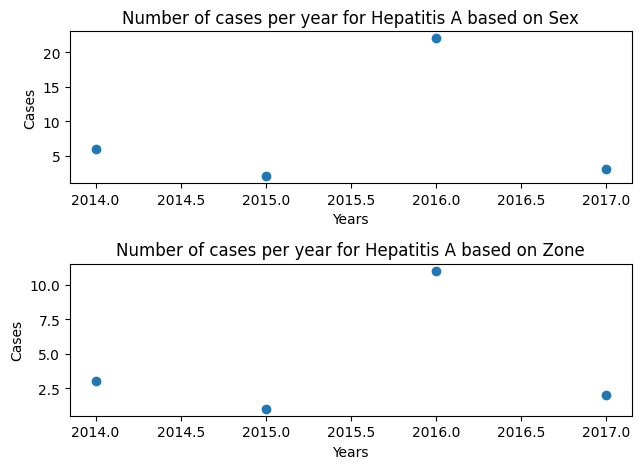

In [51]:
# 8. plot the total number of cases for each year, for the disease indicated in 'diseaseName'
#    Use the matplotlib scatter function (https://matplotlib.org/stable/plot_types/basic/scatter_plot.html)

diseaseName = 'Hepatitis A'

fig, ax = plt.subplots(2)

years = [2014, 2015, 2016, 2017]
cSex = []
cZone= []
for year in range(2014,2018):
    lookforSex = (dfSex['Year'] == year) & (dfSex['Disease'].isin([diseaseName]))
    lookforZone = (dfZone['Year'] == year) & (dfZone['Disease'].isin([diseaseName]))
    
    casesSex = dfSex[lookforSex][['Sex', 'Number of Cases']].fillna(0)
    casesZone = dfZone[lookforZone][['Zone', 'Number of Cases']].fillna(0)
    
    sumSex = 0
    sumZone = 0

    
    fem = casesSex.loc[casesSex['Sex'] == 'Female', 'Number of Cases']
    mal = casesSex.loc[casesSex['Sex'] == 'Male', 'Number of Cases']
    allSex = casesSex.loc[casesSex['Sex'] == 'All', 'Number of Cases']

        
    if(not fem.empty):
        sumSex += fem.values[0]
    if(not mal.empty):
        sumSex += mal.values[0]
    if(not allSex.empty):
            sumSex += allSex.values[0]

    
    east = casesZone.loc[casesZone['Zone'] == 'Eastern', 'Number of Cases']
    north = casesZone.loc[casesZone['Zone'] == 'Northern', 'Number of Cases']
    west = casesZone.loc[casesZone['Zone'] == 'Western', 'Number of Cases']
    cent = casesZone.loc[casesZone['Zone'] == 'Central', 'Number of Cases']
    allZone = casesZone.loc[casesZone['Zone'] == 'Nova Scotia', 'Number of Cases']
    
    if(not east.empty):
        sumZone += east.values[0]
    if(not north.empty):
        sumZone += north.values[0]
    if(not west.empty):
        sumZone += west.values[0]
    if(not cent.empty):
        sumZone += cent.values[0]
    if(not allZone.empty):
        sumZone = allZone.values[0]
    
    cSex += [sumSex]
    cZone += [sumZone]

    
ax[0].scatter(years, cSex)
ax[0].set_xlabel(f'Years')
ax[0].set_ylabel(f'Cases')
ax[0].set_title(f'Number of cases per year for {diseaseName} based on Sex')
ax[1].scatter(years, cZone)
ax[1].set_title(f'Number of cases per year for {diseaseName} based on Zone')
ax[1].set_xlabel(f'Years')
ax[1].set_ylabel(f'Cases')

fig.tight_layout()
plt.show()


### Assessment for section 1

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Load          |     | /2      |           |
| 2  | Sort          |     | /5      |           |
| 3  | Duplicates    |     | /3      |           |
| 4  | Missing       |     | /5      |           |
| 5  | Out-of-bounds |     | /2      |           |
| 6  | Intra check   |     | /3      |           |
| 7  | Inter check   |     | /3      |           |
| 8  | Plot          |     | /2      |           |
| -  | TOTAL         |     | /25     |           |


## Section 2 - Data imputation, reduction, and basic analysis

The novel coronavirus disease 2019 ([COVID-19](https://www.canada.ca/en/public-health/services/diseases/coronavirus-disease-covid-19.html)) is a contagious disease caused by the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first known case was identified in December 2019. The disease quickly spread worldwide, resulting in the COVID-19 pandemic. 

In this Section, we will use some simple data science techniques to 1) identify similarities between countries, 2) identify covariates that relate to 

### Dataset: Our World in Data COVID 

The data for this section come [Our World in Data](https://ourworldindata.org/coronavirus), i.e., from their GitHub [repository](https://github.com/owid/covid-19-data/tree/master/public/data). More specifically, the that team aggregated data from multiple sources such as [Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19), various official national sources, the United Nations, the World Bank, Global Burden of Disease, and others. It is released under the [Creative Commons BY License](https://creativecommons.org/licenses/by/4.0/).

There are 67 features in the dataset, only some of which we will use. For information on these, consult https://github.com/owid/covid-19-data/tree/master/public/data.

### Tasks

Our task is to look for simple patterns in the COVID data. First, we will 'fill in the blanks' in the data through imputation, project the data down into fewer dimensions, perform some simple distribution fitting to the data, compute measures of entropy, and finally look for features that are highly related or informative.

Complete each of the code cells below according to the instructions in the comments.

In [52]:
from sklearn.impute import KNNImputer

In [54]:
# 1. Impute mising data
#    - Select only countries with a population >= 30 million
#    - Use the KNNImputer from scikit-learn, with k=3 nearest neighbours, to impute missing
#      numeric data among the selected countries
#    - Your resulting DataFrame should have all text and numeric fields below

# Note: you are encouraged to download this file either from here or from Brightspace directly and to use it locally,
#       as long as your code works for the markers (e.g., do not hardcode local paths in submission).
urlCOVID = 'https://dal.brightspace.com/d2l/le/dropbox/250788/174362/DownloadAttachment?fid=14594172'

text_fields = ['location','date']
numeric_fields = ['new_cases_per_million', 'new_deaths_per_million', 
                  'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred', 
                  'stringency_index', 'population_density', 'median_age', 
                  'gdp_per_capita','extreme_poverty','cardiovasc_death_rate',
                  'hospital_beds_per_thousand','life_expectancy','human_development_index',
                  'population']

# TODO: your code goes here
dfCovid = pd.read_csv('owid-covid-data.csv', sep=',', na_values=np.nan, dtype={
    'location': str, 
    'date': str,
    'new_cases_per_million':float, 
    'new_deaths_per_million':float, 
    'people_vaccinated_per_hundred': float,
    'people_fully_vaccinated_per_hundred': float, 
    'stringency_index': float, 
    'population_density': float, 
    'median_age': float, 
    'gdp_per_capita': float,
    'extreme_poverty': float,
    'cardiovasc_death_rate': float,
    'hospital_beds_per_thousand': float,
    'life_expectancy': float,
    'human_development_index': float,
    'population': float
})

to_fix = (dfCovid[numeric_fields])
lookfor = (to_fix['population'] >= 30000000.00)

knn = KNNImputer(n_neighbors=3)
transformed_data = knn.fit_transform(to_fix[lookfor])
np.savetxt('transformed.csv', transformed_data, delimiter=',')



KeyboardInterrupt: 

In [55]:
print(transformed_data)

[[1.22000000e-01 0.00000000e+00 1.30433333e+01 ... 6.48300000e+01
  5.11000000e-01 4.11287720e+07]
 [0.00000000e+00 0.00000000e+00 1.30433333e+01 ... 6.48300000e+01
  5.11000000e-01 4.11287720e+07]
 [0.00000000e+00 0.00000000e+00 1.30433333e+01 ... 6.48300000e+01
  5.11000000e-01 4.11287720e+07]
 ...
 [0.00000000e+00 0.00000000e+00 1.21333333e+00 ... 6.61200000e+01
  4.70000000e-01 3.36966120e+07]
 [0.00000000e+00 0.00000000e+00 1.21333333e+00 ... 6.61200000e+01
  4.70000000e-01 3.36966120e+07]
 [0.00000000e+00 0.00000000e+00 1.21333333e+00 ... 6.61200000e+01
  4.70000000e-01 3.36966120e+07]]


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# 2. Extract the top 10 principal components

# TODO: your code goes here
pca=PCA(n_components=10)
data = pca.fit_transform(transformed_data)


new_cases_per_million:



2024-02-05 14:45:40.617 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=3.2e-05)
2024-02-05 14:45:40.629 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=3e-06)
2024-02-05 14:45:40.738 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=4.4e-05)
2024-02-05 14:45:40.990 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=2.8e-05)
2024-02-05 14:45:41.378 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=3.1e-05)
2024-02-05 14:45:44.023 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=4.2e-05)
2024-02-05 14:45:44.290 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=4.5e-05)
2024-02-05 14:45:44.651 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 dist

new_deaths_per_million:



2024-02-05 14:45:46.859 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.637336)
2024-02-05 14:45:47.034 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.892999)
2024-02-05 14:45:47.114 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.56861)
2024-02-05 14:45:47.410 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.220002)
2024-02-05 14:45:49.312 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.880565)
2024-02-05 14:45:49.700 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.28765)
2024-02-05 14:45:49.861 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.386321)
2024-02-05 14:45:50.359 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted log

people_vaccinated_per_hundred:



2024-02-05 14:45:51.878 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.023054)
2024-02-05 14:45:51.895 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.016899)
2024-02-05 14:45:52.021 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.019744)
2024-02-05 14:45:52.123 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.022405)
2024-02-05 14:45:52.358 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.02406)
2024-02-05 14:45:54.251 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.012736)
2024-02-05 14:45:54.601 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.016492)
2024-02-05 14:45:54.882 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted c

people_fully_vaccinated_per_hundred:



2024-02-05 14:45:57.159 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.039106)
2024-02-05 14:45:57.278 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.03627)
2024-02-05 14:45:57.398 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.038076)
2024-02-05 14:45:57.655 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.038354)
2024-02-05 14:45:59.475 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.025378)
2024-02-05 14:46:00.008 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.023285)
2024-02-05 14:46:00.083 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.055208)
2024-02-05 14:46:00.309 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lo

stringency_index:



2024-02-05 14:46:02.395 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.006112)
2024-02-05 14:46:02.483 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.00519)
2024-02-05 14:46:02.738 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.005443)
2024-02-05 14:46:04.465 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.031445)
2024-02-05 14:46:05.088 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.004492)
2024-02-05 14:46:05.403 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.079564)
2024-02-05 14:46:05.712 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.004418)
2024-02-05 14:46:07.076 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted

population_density:



2024-02-05 14:46:07.491 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.000243)
2024-02-05 14:46:07.647 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.000364)
2024-02-05 14:46:07.738 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.000211)
2024-02-05 14:46:07.888 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=7.9e-05)
2024-02-05 14:46:08.072 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.000142)
2024-02-05 14:46:08.124 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.000212)
2024-02-05 14:46:09.851 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.000112)
2024-02-05 14:46:09.927 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted

median_age:



2024-02-05 14:46:11.964 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.312841)
2024-02-05 14:46:12.144 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.309121)
2024-02-05 14:46:12.234 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.314357)
2024-02-05 14:46:12.431 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.312841)
2024-02-05 14:46:12.455 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.318093)
2024-02-05 14:46:12.518 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.325156)
2024-02-05 14:46:12.924 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.312844)
2024-02-05 14:46:14.170 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitte

gdp_per_capita:



2024-02-05 14:46:16.697 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-02-05 14:46:16.896 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-02-05 14:46:16.943 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.0)
2024-02-05 14:46:17.152 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.0)
2024-02-05 14:46:17.207 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.0)
2024-02-05 14:46:18.851 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.0)
2024-02-05 14:46:18.883 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-02-05 14:46:20.739 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=

extreme_poverty:



2024-02-05 14:46:21.123 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.149249)
2024-02-05 14:46:21.252 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.247046)
2024-02-05 14:46:21.455 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.222092)
2024-02-05 14:46:21.930 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.079526)
2024-02-05 14:46:21.948 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.108608)
2024-02-05 14:46:22.094 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.180156)
2024-02-05 14:46:23.798 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.070368)
2024-02-05 14:46:23.883 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitt

cardiovasc_death_rate:



2024-02-05 14:46:26.043 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.000768)
2024-02-05 14:46:26.239 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.000902)
2024-02-05 14:46:26.368 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.000735)
2024-02-05 14:46:26.436 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.000729)
2024-02-05 14:46:26.596 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.000751)
2024-02-05 14:46:26.630 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.000892)
2024-02-05 14:46:26.998 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.000732)
2024-02-05 14:46:27.591 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitt

hospital_beds_per_thousand:



2024-02-05 14:46:30.774 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=2.770695)
2024-02-05 14:46:30.913 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=2.119049)
2024-02-05 14:46:31.025 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=1.882378)
2024-02-05 14:46:31.093 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=2.058544)
2024-02-05 14:46:31.183 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=2.562134)
2024-02-05 14:46:32.736 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=2.992683)
2024-02-05 14:46:32.782 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=2.735067)
2024-02-05 14:46:34.097 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitte

life_expectancy:



2024-02-05 14:46:34.500 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.472806)
2024-02-05 14:46:34.633 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.415758)
2024-02-05 14:46:34.776 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.409621)
2024-02-05 14:46:34.831 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.393925)
2024-02-05 14:46:34.910 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.388665)
2024-02-05 14:46:35.000 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.390628)
2024-02-05 14:46:36.710 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.389942)
2024-02-05 14:46:36.810 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitt

human_development_index:



2024-02-05 14:46:39.180 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1217.244343)
2024-02-05 14:46:39.336 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1271.340293)
2024-02-05 14:46:39.484 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=1284.41622)
2024-02-05 14:46:39.570 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=1253.413657)
2024-02-05 14:46:39.580 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=1262.902943)
2024-02-05 14:46:40.706 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=1243.378965)
2024-02-05 14:46:40.888 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=1675.515879)
2024-02-05 14:46:41.332 | INFO     | fitter.fitter:_fit_single_d

population:



2024-02-05 14:46:41.778 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.0)
2024-02-05 14:46:41.789 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.0)
2024-02-05 14:46:41.947 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-02-05 14:46:42.133 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-02-05 14:46:42.273 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.0)
2024-02-05 14:46:42.557 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.0)
2024-02-05 14:46:42.674 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.0)
2024-02-05 14:46:44.277 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0

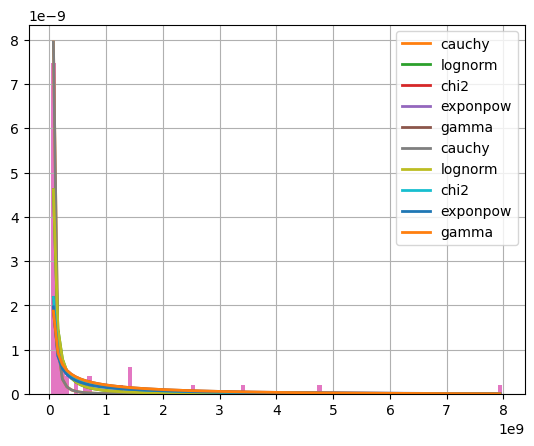

In [62]:
# 3. For each numeric field separately, using the imputed data:
#        a) identify best distributions using the Fitter library 
#           (https://pypi.org/project/fitter/) 
#           Only consider the subset in common_distributions
#        b) print the summary for each fit using the built in fitter summary() function
#        c) plot the data using the Fitter.hist() function
#        d) plot the density function using the Fitter.plot_pdf() function

common_distributions = get_common_distributions()
dist = []
# For each numeric field separately, using the imputed data:
for t, n in zip(transformed_data.T, numeric_fields):
    print(f'{n}:\n')
    fit = Fitter(t, distributions=common_distributions)
    # a
    fit.fit()
    dist += [(list(fit.get_best().keys())[0], fit.fitted_param[list(fit.get_best().keys())[0]])]
    #b
    fit.summary()
    fit.hist()
    fit.plot_pdf()

In [76]:
# 4. For each numeric field separately, using the imputed data:
#        a) Using the best distribution from the previous cell, _and all of its parameters_,
#           print the results of the associated entropy() method in scipy.stats
#           e.g., if the best distribution found is chi2, call
#                 scipy.stats.chi2.entropy( mydf, loc=myloc, scale=myscale ) for 
#                 computed values of mydf, myloc, and myscale
#        b) bin the data for that field once into 100 equal-width bins and
#           once into 100 equal-frequency bins. Store the proportional frequency of
#           each bin, relative to the total number of samples, in p_equalWidth and 
#           p_equalFreq, below

#        c) compute and print the Shannon entropy on each of p_equalWidth and p_equalFreq using
#           https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html
#
#    In the Markdown cell below, describe in your own words what differences you observe
#    in the results between the distribution-based and the two Shannon-based entropy methods.
#    Which numeric field is the most informative? Which is the least informative?
# TODO: your code goes here

entropies = []
for d, p in dist:
    if (d == 'expon'):
        entropies += [scipy.stats.expon.entropy(*p)]
    elif (d == 'exponpow'):
        entropies += [scipy.stats.exponpow.entropy(*p)]
    elif (d == 'norm'):
        entropies += [scipy.stats.norm.entropy(*p)]
    elif (d == 'lognorm'):
        entropies += [scipy.stats.lognorm.entropy(*p)]
    elif (d == 'uniform'):
        entropies += [scipy.stats.uniform.entropy(*p)]
    elif (d == 'gamma'):
        entropies += [scipy.stats.gamma.entropy(*p)]
    elif (d == 'cauchy'):
        entropies += [scipy.stats.cauchy.entropy(*p)]

binsEqualWidth = []
binsEqualFreq = []
for d in transformed_data.T:
    binsEqualWidth += [np.histogram(d, bins=np.linspace(d.min(), d.max(), 101))]
    binsEqualFreq += [pd.qcut(d, q=np.linspace(0, 1, 101), duplicates='drop')]


p_equalWidth = pd.DataFrame()
p_equalFreq = pd.DataFrame()

#    discretize data in two methods - equal probability vs equal size.
#    compute entropy.
p_equalWidth = np.zeros(100)
p_equalFreq  = np.zeros(100)

# TODO: your code goes here

**TODO**: Enter your discussion for task 4 of Section 2 here, in no more than 10 sentences.

In [ ]:
# 5. Identify variables that relate to important COVID outcomes
#    For each of 'new_cases_per_million' and 'new_deaths_per_million', compute Pearson
#    correlation (using https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
#    with that field and all other numeric fields
#
#        For the 4 features most correlated with the outcome of interest, plot a 5x5 
#        SeaBorn PairGrid (https://seaborn.pydata.org/generated/seaborn.PairGrid.html) with
#        scatter in the upper matrix, histograms on the diagonal, and kde plots on the 
#        lower matrix, as in:
#
#               g = sns.PairGrid(penguins, diag_sharey=False)
#               g.map_upper(sns.scatterplot)
#               g.map_lower(sns.kdeplot)
#               g.map_diag(sns.histplot)
#
#    In the Markdown cell below, list the features that are most correlated with 
#    'new_cases_per_million' and 'new_deaths_per_million'. Are these the same that 
#    were 'informative' in task 4 of Section 2? Why or why not?
#
# TODO: your code goes here

**TODO**: Enter your discussion for task 5 of Section 2 here, in no more than 5 sentences.

### Assessment for section 2

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Impute        |     | /4      |           |
| 2  | PCA           |     | /1      |           |
| 3  | Fit           |     | /4      |           |
| 4  | Entropy       |     | /8      |           |  
| 5  | Correlations  |     | /5      |           |
| -  | TOTAL         |     | /22     |           |

## Bonus [5 Marks]

- We will give up to 5 bonus marks for innovative work going substantially beyond the minimal requirements. 
- These marks can make up for marks lost in other sections of the assignment, but your overall mark for this assignment cannot exceed 100%. 
- You may decide to pursue any number of tasks of your own design related to this assignment, although you should consult with the instructor or the lead TA before embarking on such exploration, and the value of bonus work is left to the discretion of the markers. 
- Be sure to document your work sufficiently for the markers to understand what you're doing. You can add additional Code or MarkDown cells below, as necessary.
- Certainly, the rest of the assignment takes higher priority. 

Some ideas:

1. **Outlier corruptions**. Introduce some outliers to the data in Section 1, and write a program that can identify and potentially remove those outliers. Experiment with different methods of ourlier detection, compare them, and report your results.
2. **Spelling correction**. Correct the spelling errors in Section 1, or at least identify which text fields have errors in them. 
3. **Imputation**. Perform imputation for the missing Nova Scotia data in Section 1.
4. **Better correlations**. Are there better ways of assessing correlation between variables across time series, in Section 2?
5. **Differential entropy**. Consider reading scientific articles on differential entropy, using the method from scipy.stats.differential_entropy, and comparing against the results you obtained in Section 2. How do you expect the results to differ? How are the results different?
6. **Analysis of principal components**. Repeat some of the analysis you did with the original features (e.g., entropy) but with the principal components you extracted. What do you observe across the principal components? How are the results different than with the original features?
7. **General improvements**. Are there any approaches prescribed in this assignment that would have been more appropriate or meaningful?


In [ ]:
# BONUS Section

# TODO YOUR CODE GOES HERE

**TODO**: Any discussion for the Bonus section goes here. Feel free to add additional cells below this one, and before the assessment cell. 

### Assessment for bonus section

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Bonus         |     | /5      |           |


## Academic Integrity

The following is template information. If there is any ambiguity or contradiction with official Dalhousie University policies, those Dalhousie University policies take effect.

At Dalhousie University, we respect the values of academic integrity: honesty, trust, fairness, responsibility, and respect. As a student, adherence to the values of academic integrity and related policies is a requirement of being part of the academic community at Dalhousie University.

### What does academic integrity mean?

Academic integrity means being honest in the fulfillment of your academic responsibilities thus establishing mutual trust. Fairness is essential to the interactions of the academic community and is achieved through respect for the opinions and ideas of others. Violations of intellectual honesty are oﬀensive to the entire academic community, not just to the individual faculty member and students in whose class an oﬀence occur (See the Dalhousie Secretariat's page on [Academic Integrity](https://www.dal.ca/dept/university_secretariat/academic-integrity.html).

### How can you achieve academic integrity?

- Make sure you understand Dalhousie’s policies on academic integrity.
- Give appropriate credit to the sources used in your assignment such as written or oral work, computer codes/programs, artistic or architectural works, scientific projects,  performances,  web page designs, graphical representations, diagrams, videos, and images. Use [RefWorks](http://www.library.dal.ca/How/RefWorks) to keep track of your research and edit and format bibliographies in the citation style required by the instructor.
- Do not download the work of another from the Internet and submit it as your own.
- Do not submit work that has been completed through collaboration or previously submitted for another assignment without permission from your instructor.
- Do not write an examination or test for someone else.
- Do not falsify data or lab results.

These examples should be considered only as a guide and not an exhaustive list.

### What will happen if an allegation of an academic oﬀence is made against you?

The teaching team is required to report any suspected oﬀence. The full process is outlined in the Discipline flow chart, which can be found [here](https://cdn.dal.ca/content/dam/dalhousie/pdf/dept/university_secretariat/FDPflowchartSEpt2016.pdf) and includes the following:

1. Each Faculty has an Academic Integrity Oﬃcer (AIO) who receives allegations from instructors.
2. The AIO decides whether to proceed with the allegation and you will be notified of the process.
3. If the case proceeds, you will receive an INC (incomplete) grade until the matter is resolved.
4. If you are found guilty of an academic oﬀence, a penalty will be assigned ranging from a warning to a suspension or expulsion from the University and can include a notation on your transcript, failure of the assignment or failure of the course. All penalties are academic in nature.

### Where can you turn for help?

- If you are ever unsure about ANYTHING, contact the teaching team or lead instructor.
- The Academic Integrity website (http://academicintegrity.dal.ca) has links to policies, definitions, online tutorials, tips on citing and paraphrasing.
- The Writing Center provides assistance with proofreading, writing styles, citations.
- Dalhousie Libraries have workshops, online tutorials, citation guides, Assignment Calculator, RefWorks, etc.
- The Dalhousie Student Advocacy Service assists students with academic appeals and student discipline procedures.
- The Senate Oﬃce provides links to a list of Academic Integrity Oﬃcers, discipline flow chart, and Senate Discipline Committee.


## Academic offenses

There is a zero-tolerance policy on academic offenses such as plagiarism or inappropriate collaboration. By submitting your solution for this assignment, you acknowledge that the code submitted is your own work. You also agree that your code may be submitted to plagiarism detection software (such as MOSS) unless you have notified the teaching team otherwise, in writing, before the submission deadline. Any suspected act of plagiarism will be reported to the Faculty’s Academic Integrity Officer in accordance with Dalhousie University’s regulations regarding Academic Integrity. Please note that:

1. The assignments are individual assignments. You can discuss the problems with your friends/classmates, but you need to write your program by yourself. There should not be much similarity in terms of coding. 
2. When you refer to some online resources to complete your program, you need to understand the mechanism, then write your own code. Your code should not be similar to the online resources. In addition, you should cite the sources via comments in your program.

